# Azure Computer Vision 4 (Florence)

## Fashion Visual Search - Images analysis

<img src="header.png">
<br>
<i>Note: this image was generated with Azure Open AI Dall-e 2</i>

### Visual search with vector embeddings
**Vector embeddings** are a way of representing content such as text or images as vectors of real numbers in a high-dimensional space. These embeddings are often learned from large amounts of textual and visual data using machine learning algorithms like neural networks. Each dimension of the vector corresponds to a different feature or attribute of the content, such as its semantic meaning, syntactic role, or context in which it commonly appears. By representing content as vectors, we can perform mathematical operations on them to compare their similarity or use them as inputs to machine learning models.

<img src="multi_modal.jpg">

### Business applications
- **Digital asset management**: Image retrieval can be used to manage large collections of digital images, such as in museums, archives, or online galleries. Users can search for images based on visual features and retrieve the images that match their criteria.
- **Medical image retrieval**: Image retrieval can be used in medical imaging to search for images based on their diagnostic features or disease patterns. This can help doctors or researchers to identify similar cases or track disease progression.
- **Security and surveillance**: Image retrieval can be used in security and surveillance systems to search for images based on specific features or patterns, such as in, people & object tracking, or threat detection.
- **Forensic image retrieval**: Image retrieval can be used in forensic investigations to search for images based on their visual content or metadata, such as in cases of cyber-crime.
- **E-commerce**: Image retrieval can be used in online shopping applications to search for similar products based on their features or descriptions or provide recommendations based on previous purchases.
- **Fashion and design**: Image retrieval can be used in fashion and design to search for images based on their visual features, such as color, pattern, or texture. This can help designers or retailers to identify similar products or trends.

### Visual Search Process
<img src="process.png">

### Image Retrieval with Azure Computer Vision Documentation
- https://learn.microsoft.com/en-us/azure/cognitive-services/computer-vision/concept-image-retrieval
- https://learn.microsoft.com/en-us/azure/cognitive-services/computer-vision/how-to/image-retrieval

### Demo images
The images used in this demo are available here: 
https://bss-gn103.seismic.com/api/download/v1/blob?t=microsoft&c=microsoft-collaboration&id=090646ac-e0f3-433e-afeb-798bc2043a27&et=20230406092024&fn=fashion.ZIP&sig=dAHPKYNSEy2YwSUYMXpqOtgNHhM2tqyCbmQLy0CV8%2BQ%3D


They are a sample of this collection of images: https://www.kaggle.com/competitions/h-and-m-personalized-fashion-recommendations/data
<br><br>
> Serge Retkowsky | Microsoft | https://github.com/retkowsky | 18th of April, 2023

## 1. <a name="chapt1"></a> Librairies

In [14]:
#%pip install https://pypi.org/project/cleanvision/

In [1]:
import datetime
import glob
import os
import sys
import time
import urllib
import urllib.request

from cleanvision.imagelab import Imagelab
from PIL import Image

### Importing our specific functions

In [2]:
pyfile = "visualsearch.py"

print("Python file:", pyfile, "Date:", time.ctime(os.path.getmtime(pyfile)))

Python file: visualsearch.py Date: Tue Apr 18 09:10:01 2023


In [3]:
from visualsearch import (
    view_image,
    describe_image_with_AzureCV4,
)

## 2. <a name="chapt2"></a> Informations

In [4]:
sys.version

'3.8.5 (default, Sep  4 2020, 07:30:14) \n[GCC 7.3.0]'

In [5]:
print("Today is", datetime.datetime.today())

Today is 2023-04-18 12:13:01.535639


## 3. <a name="chapt3"></a> Our products images

In [20]:
IMAGES_DIR = "fashion"

os.makedirs(IMAGES_DIR, exist_ok=True)

In [7]:
os.chdir(IMAGES_DIR)

### Downloading the images

In [9]:
download_url = "https://bss-gn103.seismic.com/api/download/v1/blob?t=microsoft&c=microsoft-collaboration&id=090646ac-e0f3-433e-afeb-798bc2043a27&et=20230418160503&fn=fashion.zip&sig=DboLhPP8AqmLczWXUHfE%2B8fw2%2BcedPiPnO6dh2FYUlU%3D"
zip_file = "fashion.zip"

start = time.time()
print("Downloading the images zip file...")

urllib.request.urlretrieve(download_url, filename=zip_file)

print("Done\n")
elapsed = time.time() - start
print("Elapsed time: " + time.strftime("%H:%M:%S.{}".format(str(elapsed % 1)[2:])[:15],
                                       time.gmtime(elapsed)))

Done

Elapsed time: 00:00:58.213648


In [11]:
os.chdir("..")

In [13]:
print("Unzipping the file...")
start = time.time()

!unzip -q $IMAGES_DIR/$zip_file

print("Done\n")
elapsed = time.time() - start
print("Elapsed time: " + time.strftime("%H:%M:%S.{}".format(str(elapsed % 1)[2:])[:15],
                                       time.gmtime(elapsed)))

Unzipping the file...
Done

Elapsed time: 00:18:12.648610


In [15]:
print("Removing the zip file:", zip_file)
os.remove(os.path.join(IMAGES_DIR, zip_file))
print("Done")

Removing the zip file: fashion.zip
Done


In [21]:
image_extensions = ['.jpg', '.jpeg', '.png']

image_files = [os.path.join(IMAGES_DIR, f)
               for f in os.listdir(IMAGES_DIR)
               if os.path.splitext(f)[1] in image_extensions]

print("Directory of images:", IMAGES_DIR)
print("Total number of catalog images =", "{:,}".format(len(image_files)))

Directory of images: fashion
Total number of catalog images = 10,226


### Some images

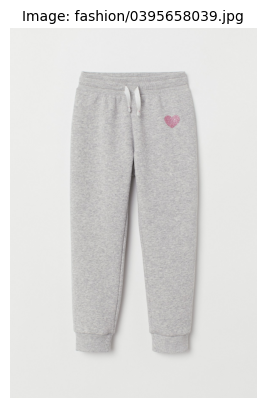

Automatic analysis of the image using Azure Computer Vision 4.0:

   Main caption:
    a pair of grey sweatpants with a heart on the side = 0.457

   Detected tags:
    clothing           = 0.998
    trouser            = 0.893
    person             = 0.692


In [23]:
idx = 100

view_image(image_files[idx])
describe_image_with_AzureCV4(image_files[idx])

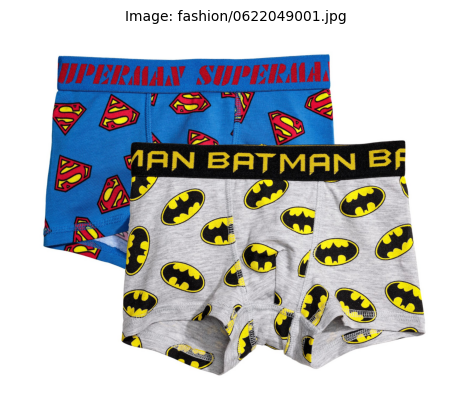

Automatic analysis of the image using Azure Computer Vision 4.0:

   Main caption:
    a pair of blue and grey boxer briefs with yellow and red superheroes = 0.360

   Detected tags:
    clothing           = 0.989
    underpants         = 0.956
    text               = 0.887
    shorts             = 0.852


In [24]:
idx = 1000

view_image(image_files[idx])
describe_image_with_AzureCV4(image_files[idx])

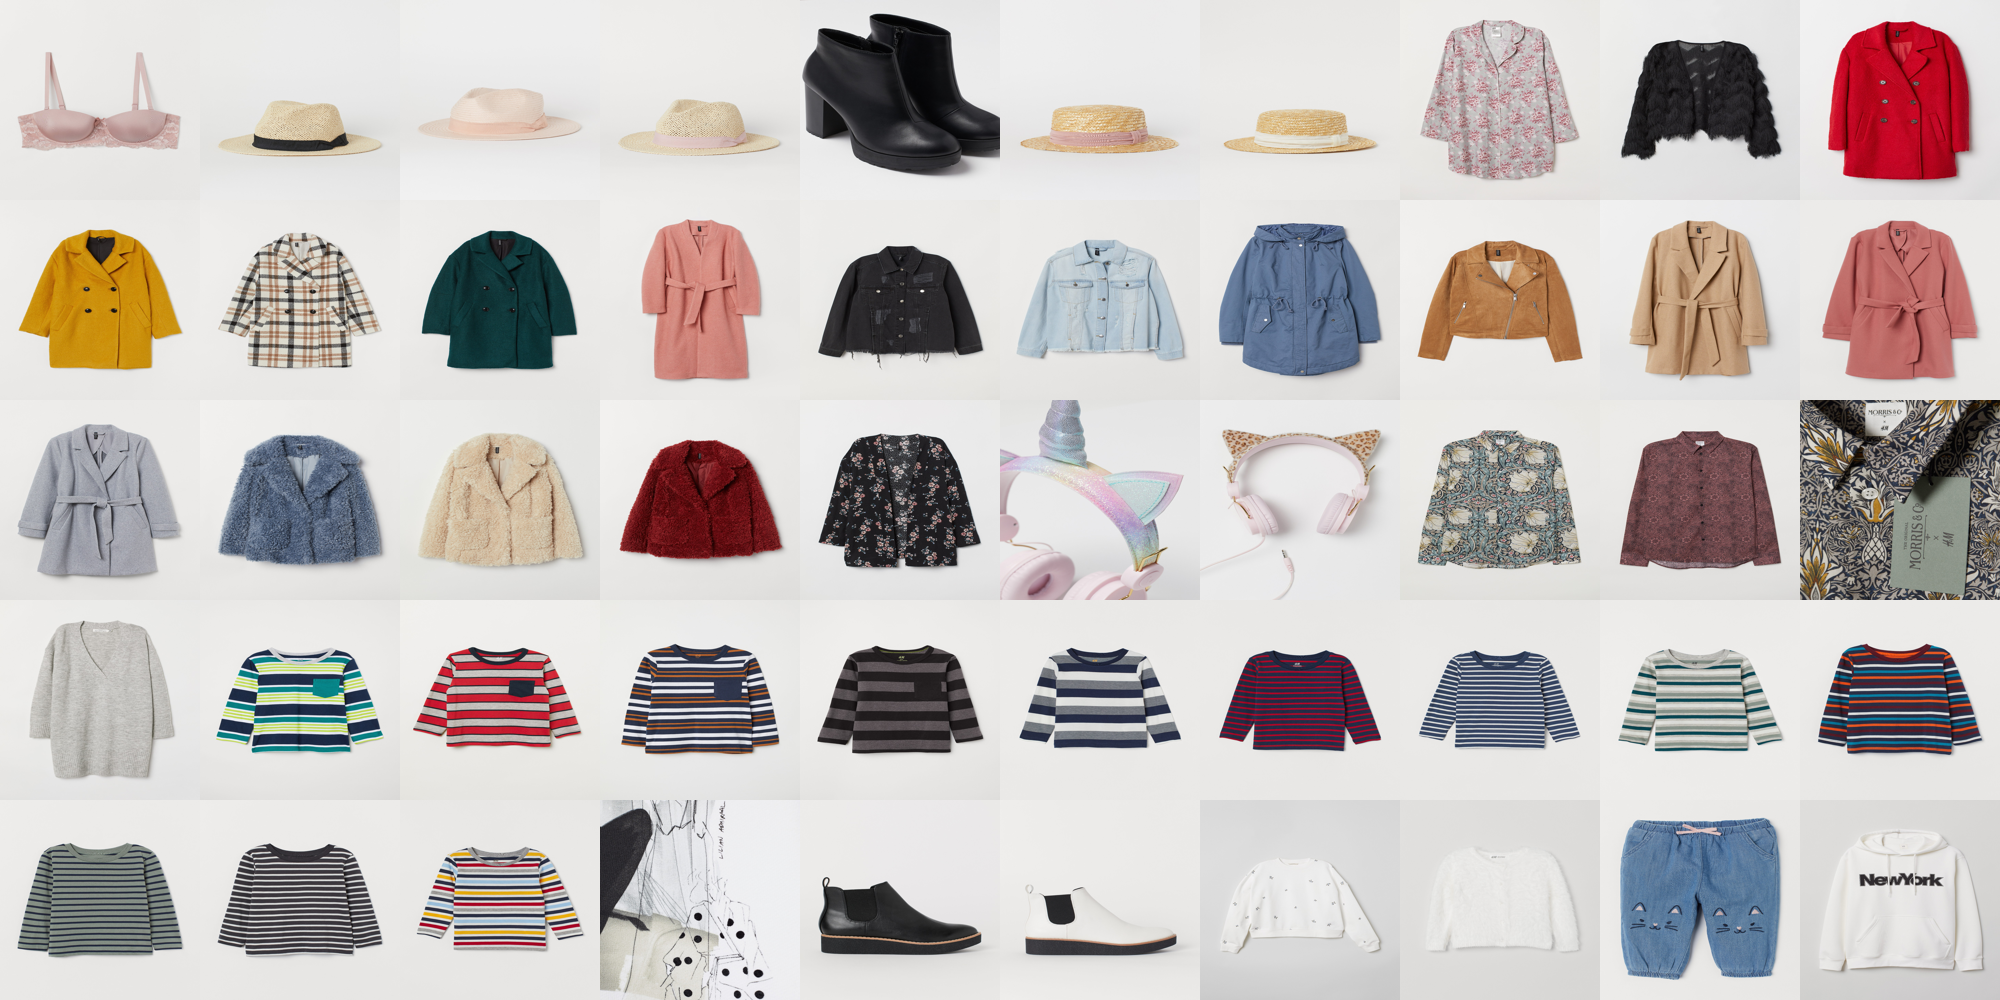

In [25]:
num_images_per_row = 10
num_images_per_col = 5
img_size = 200
start = 10000

samples = image_files[start:start + (num_images_per_row * num_images_per_col)]

samples_images = Image.new(
    'RGB', (num_images_per_row * img_size, num_images_per_col * img_size))

# Load and resize the images
sample_images = [
    Image.open(image_file).resize((img_size, img_size))
    for image_file in samples
]

# Paste the images onto the new image
for idx, img in enumerate(sample_images):
    x = (idx % num_images_per_row) * img_size
    y = (idx // num_images_per_row) * img_size
    samples_images.paste(img, (x, y))

samples_images

## Checking images quality

In [26]:
imagelab = Imagelab(data_path=IMAGES_DIR)

Reading images from /mnt/batch/tasks/shared/LS_root/mounts/clusters/seretkow8/code/Users/seretkow/Florence in a day/fashion


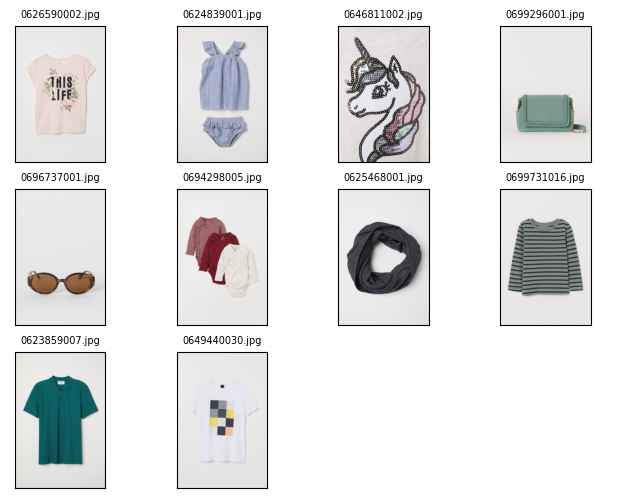

In [27]:
# Visualize a few images from the dataset with ImageLab

imagelab.visualize(num_images=10)

In [28]:
imagelab.find_issues()

Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale images ...


100%|██████████| 10226/10226 [01:59<00:00, 85.78it/s] 


Issue checks completed. To see a detailed report of issues found, use imagelab.report().


Issues found in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  0 | near_duplicates  |           83 |
|  1 | odd_aspect_ratio |           14 |
|  2 | exact_duplicates |           12 |
|  3 | dark             |            6 |
|  4 | low_information  |            3 |
|  5 | blurry           |            2 |
|  6 | light            |            1 | 


Top 4 sets of images with near_duplicates issue
Set: 0


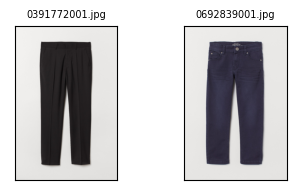

Set: 1


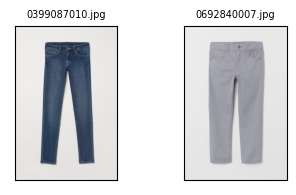

Set: 2


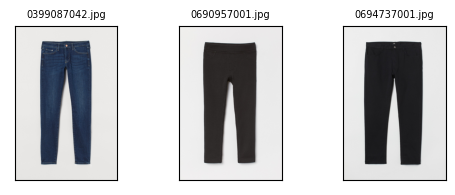

Set: 3


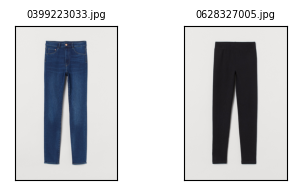


Top 4 examples with odd_aspect_ratio issue in the dataset.


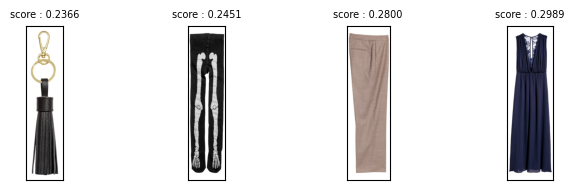


Top 4 sets of images with exact_duplicates issue
Set: 0


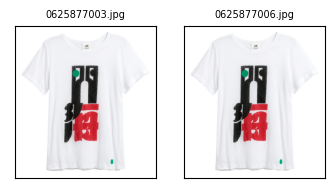

Set: 1


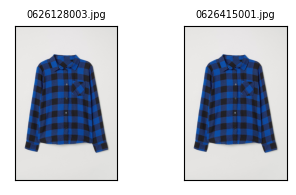

Set: 2


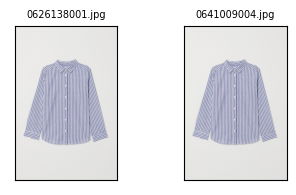

Set: 3


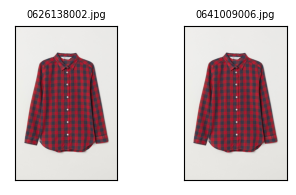


Top 4 examples with dark issue in the dataset.


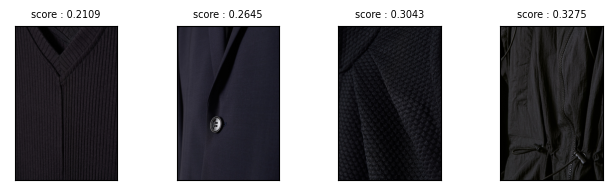

Found 3 examples with low_information issue in the dataset.


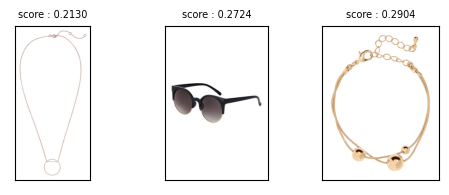

Found 2 examples with blurry issue in the dataset.


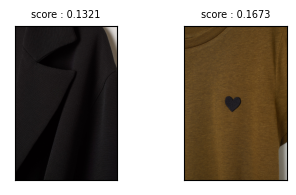

Found 1 example with light issue in the dataset.


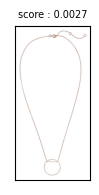

In [29]:
imagelab.report()

In [30]:
imagelab.issue_summary

,issue_type,num_images
0,near_duplicates,83
1,odd_aspect_ratio,14
2,exact_duplicates,12
3,dark,6
4,low_information,3
5,blurry,2
6,light,1
7,grayscale,0


Issues found in order of severity in the dataset

|    | issue_type      |   num_images |
|---:|:----------------|-------------:|
|  0 | near_duplicates |           83 | 


Top 4 sets of images with near_duplicates issue
Set: 0


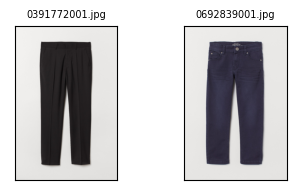

Set: 1


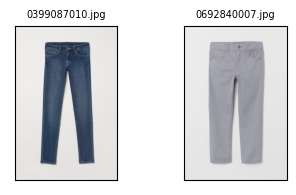

Set: 2


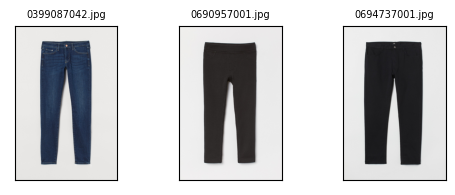

Set: 3


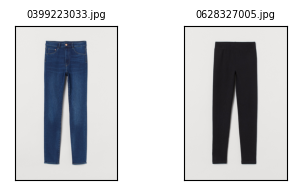

In [31]:
imagelab.report(["near_duplicates"])

Issues found in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  1 | odd_aspect_ratio |           14 | 


Top 4 examples with odd_aspect_ratio issue in the dataset.


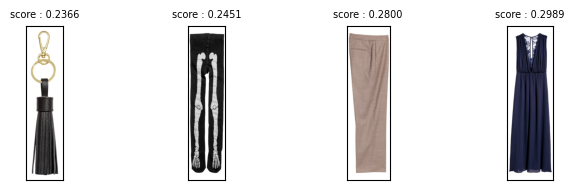

In [32]:
imagelab.report(["odd_aspect_ratio"])

Issues found in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  2 | exact_duplicates |           12 | 


Top 4 sets of images with exact_duplicates issue
Set: 0


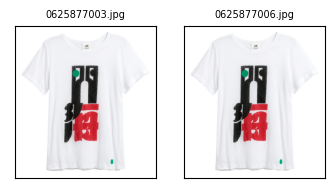

Set: 1


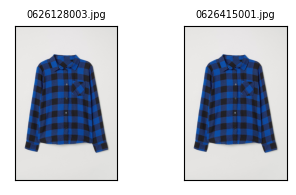

Set: 2


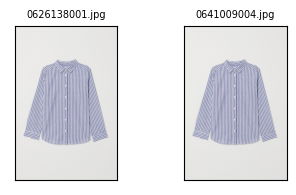

Set: 3


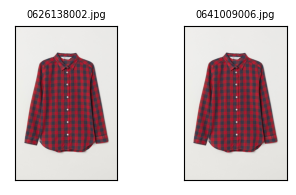

In [33]:
imagelab.report(["exact_duplicates"])

Issues found in order of severity in the dataset

|    | issue_type   |   num_images |
|---:|:-------------|-------------:|
|  3 | dark         |            6 | 


Top 4 examples with dark issue in the dataset.


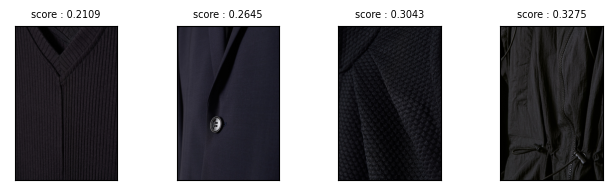

In [34]:
imagelab.report(["dark"])

Issues found in order of severity in the dataset

|    | issue_type      |   num_images |
|---:|:----------------|-------------:|
|  4 | low_information |            3 | 

Found 3 examples with low_information issue in the dataset.


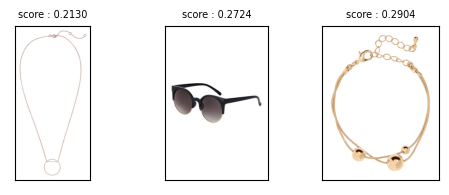

In [35]:
imagelab.report(["low_information"])

Issues found in order of severity in the dataset

|    | issue_type   |   num_images |
|---:|:-------------|-------------:|
|  6 | light        |            1 | 

Found 1 example with light issue in the dataset.


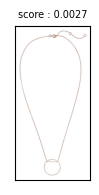

In [36]:
imagelab.report(["light"])

In [37]:
imagelab.report(["grayscale"])

Issues found in order of severity in the dataset

|    | issue_type   |   num_images |
|---:|:-------------|-------------:|
|  7 | grayscale    |            0 | 

Found 0 example with grayscale issue in the dataset.


> In the next notebook we will generate the images vectors embeddings